In [324]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re

In [325]:
#Loading the dataset
Crime_Statistics = pd.read_csv("./35100177.csv", dtype={'DGUID': str, 'TERMINATED': str}, low_memory=False)

In [326]:
#Displaying first five rows
Crime_Statistics.head(5)

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1998,Canada,2021A000011124,"Total, all violations [0]",Actual incidents,Number,223,units,0,v44348247,1.1.1,2688540.00,NaN,NaN,NaN,0
1,1998,Canada,2021A000011124,"Total, all violations [0]","Rate per 100,000 population",Rate,257,units,0,v44396346,1.1.2,8915.12,NaN,NaN,NaN,2
2,1998,Canada,2021A000011124,"Total, all violations [0]",Percentage change in rate,Percent,239,units,0,v44391402,1.1.3,NaN,..,NaN,NaN,2
3,1998,Canada,2021A000011124,"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,239,units,0,v1545644596,1.1.17,100.00,NaN,NaN,NaN,2
4,1998,Canada,2021A000011124,"Total, all violations [0]",Unfounded incidents,Number,223,units,0,v1000149311,1.1.15,NaN,..,NaN,NaN,0


## 2. Understand the Dataset

In [327]:
#Checking the shape of the dataset
Crime_Statistics.shape

(7244910, 16)

The dataset includes 7244910 rows and 16 columns.

In [328]:
#Checking the columns of the dataset
Crime_Statistics.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Violations', 'Statistics', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

The names of the 16 columns are: 'REF_DATE', 'GEO', 'DGUID', 'Violations', 'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', and 'DECIMALS'.

In [329]:
#Getting more information of the dataset
Crime_Statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7244910 entries, 0 to 7244909
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   REF_DATE       int64  
 1   GEO            object 
 2   DGUID          object 
 3   Violations     object 
 4   Statistics     object 
 5   UOM            object 
 6   UOM_ID         int64  
 7   SCALAR_FACTOR  object 
 8   SCALAR_ID      int64  
 9   VECTOR         object 
 10  COORDINATE     object 
 11  VALUE          float64
 12  STATUS         object 
 13  SYMBOL         float64
 14  TERMINATED     object 
 15  DECIMALS       int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 884.4+ MB


The above data represents the data type of each columns.

## 3. Data Filtering

As per the Metadata "Youth population data are not available prior to 2004, therefore the rates shown are incorrect and should not be used", so the best approach would be to remove the dataset till the year 2004 for reliable and accurate analysis, ensuring that all insights and conclusions drawn are based on valid and dependable data.

The dataset is now focused on reliable data from 2005 onwards.

In [330]:
#Filtering data for years 2005 and beyond
Crime_Statistics = Crime_Statistics[Crime_Statistics['REF_DATE'] >= 2005]

In [331]:
#Checking the shape of the dataset after filtering data for years
Crime_Statistics.shape

(5369589, 16)

In [332]:
#Displaying first five rows
Crime_Statistics.head(5)

,REF_DATE,GEO,DGUID,Violations,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1875321,2005,Canada,2021A000011124,"Total, all violations [0]",Actual incidents,Number,223,units,0,v44348247,1.1.1,2608741.00,NaN,NaN,NaN,0
1875322,2005,Canada,2021A000011124,"Total, all violations [0]","Rate per 100,000 population",Rate,257,units,0,v44396346,1.1.2,8090.32,NaN,NaN,NaN,2
1875323,2005,Canada,2021A000011124,"Total, all violations [0]",Percentage change in rate,Percent,239,units,0,v44391402,1.1.3,-3.59,NaN,NaN,NaN,2
1875324,2005,Canada,2021A000011124,"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,239,units,0,v1545644596,1.1.17,100.00,NaN,NaN,NaN,2
1875325,2005,Canada,2021A000011124,"Total, all violations [0]",Unfounded incidents,Number,223,units,0,v1000149311,1.1.15,NaN,..,NaN,NaN,0


## 4. Examine the unique values of each columns in the dataset and perform data cleaning if required

### Column #1: REF_DATE

In [333]:
#Checking unique values for "REF_DATE" column
Crime_Statistics['REF_DATE'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

The "REF_DATE" column in the dataset represents the year in which the crime was committed. The dataset includes the information about the crime committed in the years 2005 to 2023.

In [334]:
#Renaming the column "REF_DATE" to "Year"
Crime_Statistics.rename(columns={'REF_DATE': 'Year'}, inplace=True)

### Column #2: GEO

In [335]:
#Checking unique values for "GEO" column
Crime_Statistics['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador [10]',
       "St. John's, Newfoundland and Labrador [10001]",
       'Prince Edward Island [11]', 'Nova Scotia [12]',
       'Halifax, Nova Scotia [12205]', 'New Brunswick [13]',
       'Moncton, New Brunswick [13305]',
       'Saint John, New Brunswick [13310]', 'Quebec [24]',
       'Saguenay, Quebec [24408]', 'Québec, Quebec [24421]',
       'Sherbrooke, Quebec [24433]', 'Trois-Rivières, Quebec [24442]',
       'Montréal, Quebec [24462]', 'Ottawa-Gatineau, Quebec part [24505]',
       'Ontario [35]', 'Ottawa-Gatineau, Ontario/Quebec [24505/35505]',
       'Ottawa-Gatineau, Ontario part [35505]',
       'Kingston, Ontario [35521]',
       'Belleville-Quinte West, Ontario [35522]',
       'Peterborough, Ontario [35529]', 'Toronto, Ontario [35535]',
       'Hamilton, Ontario [35537]',
       'St. Catharines-Niagara, Ontario [35539]',
       'Kitchener-Cambridge-Waterloo, Ontario [35541]',
       'Brantford, Ontario [35543]', 'Guelph, Ontario

The "Geo" column in the dataset contains information about geographic location accross Canada, including provinces, cities, and specific areas within cities.

- Provinces: Alberta, British Columbia, Manitoba, New Brunswick, Newfoundland and Labrador, Nova Scotia, Northwest Territories, Nanavut, Ontario, Quebec, Saskatchewan, and Yukon
- Cities and Regions: Halifax, Montreal, Ottawa, Calgary, Edmonton, Red Deer, Barrie, Kingston, Thunder Bay, Regina, Brantford, Kitchener, Winnipeg, Lethbridge, Windsor, and so on.
- Specific Areas within cities: Ottawa-Gatineau, St. Catharines-Niagara, Belleville-Quinte West, and so on.

### Column #3: DGUID

In [336]:
#Checking unique values for "DGUID" column
Crime_Statistics['DGUID'].unique()

array(['2021A000011124', '2021A000210', '2021A003510001', '2021A000211',
       '2021A000212', '2021A003512205', '2021A000213', '2021A003513305',
       '2021A003513310', '2021A000224', '2021A003524408',
       '2021A003524421', '2021A003524433', '2021A003524442',
       '2021A003524462', '2021A003524505', '2021A000235', '2021A0035505',
       '2021A003535505', '2021A003535521', '2021A003535522',
       '2021A003535529', '2021A003535535', '2021A003535537',
       '2021A003535539', '2021A003535541', '2021A003535543',
       '2021A003535550', '2021A003535555', '2021A003535559',
       '2021A003535568', '2021A003535580', '2021A003535595',
       '2021A000246', '2021A003546602', '2021A000247', '2021A003547705',
       '2021A003547725', '2021A000248', '2021A003548810',
       '2021A003548825', '2021A003548835', '2021A000259',
       '2021A003559915', '2021A003559932', '2021A003559933',
       '2021A003559935', '2021A000260', '2021A000261', '2021A000262', nan,
       '2021A003513320', '2021A

The "DGUID" column in the dataset represent unique identifiers for specific geographic areas or regions. Each value in the dataset, such as 2021A000011124 appears to be a code that maps to a specific location (like province, city, or region). However, the presence of "nan" in dataset indicates there are some missing data for some records. Since we already have this information in the 'GEO' column, it would be best to drop the 'DGUID' column."



In [337]:
#Removing the column "DGUID"
Crime_Statistics.drop(columns=['DGUID'], inplace=True)

### Column #4: Violations

In [338]:
#Checking unique values for "Violations" column
Crime_Statistics['Violations'].unique()

array(['Total, all violations [0]',
       'Total, all Criminal Code violations (including traffic) [25]',
       'Total, all Criminal Code violations (excluding traffic) [50]',
       'Total violent Criminal Code violations [100]', 'Homicide [110]',
       'Murder, first degree [1110]', 'Murder, second degree [1120]',
       'Manslaughter [1130]', 'Infanticide [1140]',
       'Total other violations causing death [120]',
       'Criminal negligence causing death [1150]',
       'Other related violations causing death [1160]',
       'Attempted murder [1210]',
       'Sexual offence which occurred prior to January 4, 1983 [1300]',
       'Sexual assault, level 3, aggravated [1310]',
       'Sexual assault, level 2, weapon or bodily harm [1320]',
       'Sexual assault, level 1 [1330]',
       'Total sexual violations against children [130]',
       'Sexual interference [1345]',
       'Invitation to sexual touching [1350]',
       'Sexual exploitation [1355]',
       'Making sexually e

The column "Violations" represent different types of criminal violations or offenses, ranging from broad categories like "Total, all violations" to specific offenses such as "Murder, first degree" or "Sexual assault, level 3, aggravated.

### Column #5: Statistics

In [339]:
#Checking unique values for "Statistics" column
Crime_Statistics['Statistics'].unique()

array(['Actual incidents', 'Rate per 100,000 population',
       'Percentage change in rate',
       'Percentage contribution to the Crime Severity Index (CSI)',
       'Unfounded incidents', 'Percent unfounded', 'Total cleared',
       'Cleared by charge', 'Cleared otherwise', 'Total, persons charged',
       'Rate, total persons charged per 100,000 population aged 12 years and over',
       'Total, adult charged',
       'Rate, adult charged per 100,000 population aged 18 years and over',
       'Total, youth charged',
       'Rate, youth charged per 100,000 population aged 12 to 17 years',
       'Total, youth not charged',
       'Rate, youth not charged per 100,000 population aged 12 to 17 years'],
      dtype=object)

The column "Statistics" represent various measures related to crime data, focusing on rates, percentages, and charges.
- Incidents: Measures of actual incidents of crime, such as "Actual incidents" and "Unfounded incidents".
- Rate per Population: Crime rates calculated per 100,000 population, such as "Rate per 100,000 population" and various rates for adults and youth.
- Percentage Change: Changes in crime rate over time, such as "Percentage change in rate".
- Crime Clearance: Information on how crimes are cleared, such as "Total cleared," "Cleared by charge," and "Cleared otherwise".
- Persons Charged: Metrics related to individuals charged with crimes, including "Total, persons charged" and rates for adults and youth.

### Column #6: UOM

In [340]:
#Checking unique values for "UOM" column
Crime_Statistics['UOM'].unique()

array(['Number', 'Rate', 'Percent'], dtype=object)

The column "UOM" suggest the dataset includes different types of measurements for crime statistics.
- Number likely represents the total count of incidents or crimes, such as total number of homicides, assaults, or other crime types.
- Rate likely represents a rate per 100,000 population or another demographic group (such as adults or youth). It could refer to how frequently a crime occurs in relation to the population size.
- Percent could refer to percentage values, showing the percentage change in crime rates over time or the percentage contribution of a particular crime type to the total Crime Severity Index (CSI).

### Column #7: UOM_ID

In [341]:
#Checking unique values for "UOM_ID" column
Crime_Statistics['UOM_ID'].unique()

array([223, 257, 239])

The column "UOM_ID" represent identifier or code that correspond to different units of measurement (UOM) used in the dataset.

In [342]:
#Verifying the relationship between the values in the "UOM" column and "UOM_ID" column
print(Crime_Statistics[Crime_Statistics['UOM'] == 'Number']['UOM_ID'].unique())  # Check if it maps to 223
print(Crime_Statistics[Crime_Statistics['UOM'] == 'Rate']['UOM_ID'].unique())  # Check if it maps to 257
print(Crime_Statistics[Crime_Statistics['UOM'] == 'Percent']['UOM_ID'].unique())  # Check if it maps to 239

[223]
[257]
[239]


The output confirms that:

"Number" in the UOM column corresponds to 223 in the UOM_ID column.
"Rate" in the UOM column corresponds to 257 in the UOM_ID column.
"Percent" in the UOM column corresponds to 239 in the UOM_ID column.

Both the columns "UOM" and "UOM_ID" are mapping the same concepts, so proceeding further to drop the column.

In [343]:
#Removing the column "UOM_ID"
Crime_Statistics.drop(columns=['UOM_ID'], inplace=True)

### Column #8: SCALAR_FACTOR

In [344]:
#Checking unique values for "SCALAR_FACTOR" column
Crime_Statistics['SCALAR_FACTOR'].unique()

array(['units'], dtype=object)

The column "SCALAR_FACTOR" might indicate that the column represents measurements in units.

This column does not provide any additional information and does not add the value to the dataset, so it's best to drop the column.

In [345]:
#Removing the column "SCALAR_FACTOR"
Crime_Statistics.drop(columns=['SCALAR_FACTOR'], inplace=True)

### Column #9: SCALAR_ID

In [346]:
#Checking unique values for "SCALAR_ID" column
Crime_Statistics['SCALAR_ID'].unique()

array([0])

The column "SCALAR_ID" might be an identifier or code that corresponds to a ype of measurement or factor that applies universally ("units").

This column does not provide any additional information and does not add the value to the dataset, so it's best to drop the column.

In [347]:
#Removing the column "SCALAR_ID"
Crime_Statistics.drop(columns=['SCALAR_ID'], inplace=True)

### Column #10: VECTOR

In [348]:
#Checking unique values for "VECTOR" column
Crime_Statistics['VECTOR'].unique()

array(['v44348247', 'v44396346', 'v44391402', ..., 'v1564070709',
       'v1564070710', 'v1564070711'], dtype=object)

The column "VECTOR" likely is the identifiers for specific events, categories, or data points. These IDs could be useful for tracking or linking specific data points to detailed records. It may also indicate different categories or events related to crime data, each with its own unique identifier.

### Column #11: COORDINATE

In [349]:
#Checking unique values for "COORDINATE" column
Crime_Statistics['COORDINATE'].unique()

array(['1.1.1', '1.1.2', '1.1.3', ..., '51.321.12', '51.321.13',
       '51.321.14'], dtype=object)

The "Coordinates" column appears to contain values like '1.1.1', '1.1.2', and '51.321.12', which seem to follow a structured format. These could be geographic coordinates or hierarchical codes that represent specific locations or areas where crimes occurred.

- Hierarchical Code: The format 'x.x.x' could indicate a hierarchical or categorized system, for instance, it could represent regions or zones in a geographic area.
- Geographic Coordinates: These could also represent specific locations, though typically, geographic coordinates would use latitude and longitude (45.4215, -75.6972), so this format seems less likely to be direct GPS coordinates.

### Column #12: VALUE

In [350]:
#Checking unique values for "VALUE" column
Crime_Statistics['VALUE'].unique()

array([ 2.608741e+06,  8.090320e+03, -3.590000e+00, ...,  5.111600e+02,
        1.494850e+03,  2.360300e+02])

The column "VALUE" contains a range of numerical data, including very large values (such as 2.68854e+06), smaller values (such as 8.91512e+03), and NaN (missing values).
- Large Values are likely counts, totals, or other aggregated values. The scientific notation (e+06) represents values in the millions.
- Smaller Values might represent smaller counts or different units of measurement.
- NaN (Not a Number)represents missing or unavailable data for some records.

### Column #13: STATUS

In [351]:
#Checking unique values for "STATUS" column
Crime_Statistics['STATUS'].unique()

array([nan, '..', '0s'], dtype=object)

The "STATUS" column contains the following types of values:

NaN: Represents missing or undefined data, or indicates that no status was recorded for the entry.

'..': Used to represent suppressed data, typically for populations below 1,000 or data that cannot be disclosed due to privacy or reliability concerns.

'0s': Represents very small values (e.g., near zero but not exactly zero), often used for occurrences too insignificant to report numerically.

For now, it is best to retain this column as is, as it may be needed when handling missing data.

In [352]:
#Counting the occurrences of 'NaN', '..', and '0s' in the STATUS column
Status_MissingValuesCount = Crime_Statistics['STATUS'].value_counts(dropna=False)

#Displaying the count of each status
print(Status_MissingValuesCount)

STATUS
NaN    3720769
..     1632698
0s       16122
Name: count, dtype: int64


### Column #14: SYMBOL

In [353]:
#Checking unique values for "SYMBOL" column
Crime_Statistics['SYMBOL'].unique()

array([nan])

The column "SYMBOL" has no data, so dropping the column is the best option.

In [354]:
#Removing the column "SCALAR_ID"
Crime_Statistics.drop(columns=['SYMBOL'], inplace=True)

### Column #15: TERMINATED

In [355]:
#Checking unique values for "TERMINATED" column
Crime_Statistics['TERMINATED'].unique()

array([nan, 't'], dtype=object)

The column "TERMINATED" contains either missing value or "t" which likely stands for "termination" of some case, contract, or event. Missing value could possibly represent "non-termination of some case, contract or event".

This information could possibly provide important information in the analysis. Filling missing value with "No" and renaming "t" to "Yes" would be best approach for now.



In [356]:
#Standardizing 't' to a more descriptive label as "Terminated"
Crime_Statistics['TERMINATED'] = Crime_Statistics['TERMINATED'].replace('t', 'Yes')

In [357]:
# Replace NaN values with 'No' in the TERMINATED column
Crime_Statistics['TERMINATED'] = Crime_Statistics['TERMINATED'].fillna('No')

In [358]:
#Verifying the unique values for "Terminated" column after replacing values
Crime_Statistics['TERMINATED'].unique()

array(['No', 'Yes'], dtype=object)

### Column #16: DECIMALS

In [359]:
#Checking unique values for "DECIMALS" column
Crime_Statistics['DECIMALS'].unique()

array([0, 2])

The column "DECIMALS" represent number of decimal places used in the numerical data in another column. 
- 0: Numbers are presented as whole numbers.
- 2: Numbers are presented with two decimal places. 

This data is merely metadata and does not contribute much to the analysis, so dropping it would be the option.


In [360]:
#Removing the column "DECIMALS"
Crime_Statistics.drop(columns=['DECIMALS'], inplace=True)

## 5. Validate the dataset after the modification

In [361]:
#Displaying the first five rows after the modification
Crime_Statistics.head(5)

,Year,GEO,Violations,Statistics,UOM,VECTOR,COORDINATE,VALUE,STATUS,TERMINATED
1875321,2005,Canada,"Total, all violations [0]",Actual incidents,Number,v44348247,1.1.1,2608741.00,NaN,No
1875322,2005,Canada,"Total, all violations [0]","Rate per 100,000 population",Rate,v44396346,1.1.2,8090.32,NaN,No
1875323,2005,Canada,"Total, all violations [0]",Percentage change in rate,Percent,v44391402,1.1.3,-3.59,NaN,No
1875324,2005,Canada,"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,v1545644596,1.1.17,100.00,NaN,No
1875325,2005,Canada,"Total, all violations [0]",Unfounded incidents,Number,v1000149311,1.1.15,NaN,..,No


In [362]:
#Checking the shape of the dataset after the modification
Crime_Statistics.shape

(5369589, 10)

The new dataset after the modification contains 5369589 number of rows and 10 columns.

In [363]:
#Checking the columns of the dataset after the modification
Crime_Statistics.columns

Index(['Year', 'GEO', 'Violations', 'Statistics', 'UOM', 'VECTOR',
       'COORDINATE', 'VALUE', 'STATUS', 'TERMINATED'],
      dtype='object')

The dataset contains the following columns: Year', 'GEO', 'Violations', 'Statistics', 'UOM', 'VECTOR', 'COORDINATE', 'VALUE', STATUS, and 'TERMINATED'.

## 6. Check for Missing Values, and Handle if any

In [364]:
#Checking for missing values
print(Crime_Statistics.isnull().sum())

Year                0
GEO                 0
Violations          0
Statistics          0
UOM                 0
VECTOR              0
COORDINATE          0
VALUE         1648820
STATUS        3720769
TERMINATED          0
dtype: int64


The columns "VALUE" has 1648820 missing values. Let's go deeper in understanding the missing values in the dataset.

In [365]:
#Creating a new DataFrame with rows that have missing 'VALUE'
MissingValueDataFrame = Crime_Statistics[Crime_Statistics['VALUE'].isna()]

#Displaying the first five rows of new DataFrame
MissingValueDataFrame.head(5)

,Year,GEO,Violations,Statistics,UOM,VECTOR,COORDINATE,VALUE,STATUS,TERMINATED
1875325,2005,Canada,"Total, all violations [0]",Unfounded incidents,Number,v1000149311,1.1.15,NaN,..,No
1875326,2005,Canada,"Total, all violations [0]",Percent unfounded,Percent,v1000149312,1.1.16,NaN,..,No
1875342,2005,Canada,"Total, all Criminal Code violations (including...",Unfounded incidents,Number,v1000149313,1.2.15,NaN,..,No
1875343,2005,Canada,"Total, all Criminal Code violations (including...",Percent unfounded,Percent,v1000149314,1.2.16,NaN,..,No
1875359,2005,Canada,"Total, all Criminal Code violations (excluding...",Unfounded incidents,Number,v1000149315,1.3.15,NaN,..,No


In [366]:
#Checking the shape of Missing Value dataset
MissingValueDataFrame.shape

(1648820, 10)

In [367]:
#Counting the occurrences of total number of rows for missing values
MissingValuesCount_Statistics = MissingValueDataFrame['Statistics'].value_counts(dropna=False)

#Displaying the count of each status
print(MissingValuesCount_Statistics)

Statistics
Percent unfounded                                                            250429
Percentage change in rate                                                    214100
Unfounded incidents                                                          203631
Percentage contribution to the Crime Severity Index (CSI)                     83836
Rate, adult charged per 100,000 population aged 18 years and over             69881
Rate, total persons charged per 100,000 population aged 12 years and over     69874
Rate per 100,000 population                                                   69855
Rate, youth charged per 100,000 population aged 12 to 17 years                69715
Rate, youth not charged per 100,000 population aged 12 to 17 years            69715
Cleared by charge                                                             68473
Cleared otherwise                                                             68473
Total, persons charged                                           

The data above shows the breakdown of the number of rows with missing values for each statistics.

Now, let's analyze the breakdown of the number of rows corresponding to each statistics.

In [368]:
#Counting the occurrences of total number of rows for each Statistics in the dataset
ValuesCount = Crime_Statistics['Statistics'].value_counts(dropna=False)

#Displaying the count of each status
print(ValuesCount)

Statistics
Actual incidents                                                             315909
Total, persons charged                                                       315909
Total, youth not charged                                                     315909
Rate, youth charged per 100,000 population aged 12 to 17 years               315909
Total, youth charged                                                         315909
Rate, adult charged per 100,000 population aged 18 years and over            315909
Total, adult charged                                                         315909
Rate, total persons charged per 100,000 population aged 12 years and over    315909
Cleared otherwise                                                            315909
Rate per 100,000 population                                                  315909
Cleared by charge                                                            315909
Total cleared                                                    

Going further, let's analyze the breakdown of the number of rows for each statistic based on their status: NaN, '..', and 0s.

In [369]:
#Grouping by 'Statistics' and count occurrences of each status (NaN, '..', 0s)
StatusCountbyStatistics = Crime_Statistics.groupby('Statistics')['STATUS'].value_counts(dropna=False).unstack(fill_value=0)

#Displaying the status counts for each statistic
print(StatusCountbyStatistics)

STATUS                                                  ..     0s     NaN
Statistics                                                               
Actual incidents                                     68473      0  247436
Cleared by charge                                    68473      0  247436
Cleared otherwise                                    68473      0  247436
Percent unfounded                                   250429      0   65192
Percentage change in rate                           214094      6  101809
Percentage contribution to the Crime Severity I...   68185  15651  231785
Rate per 100,000 population                          69715    140  246054
Rate, adult charged per 100,000 population aged...   69715    166  246028
Rate, total persons charged per 100,000 populat...   69715    159  246035
Rate, youth charged per 100,000 population aged...   69715      0  246194
Rate, youth not charged per 100,000 population ...   69715      0  246194
Total cleared                         

By comparing the number of rows with missing values, we observe that the missing values for the statuses represented as '0s' and '..' contribute significantly to the overall count of missing data. While '0s' indicates an actual recorded value of zero, '..' typically represents unavailable or unreported data. This distinction highlights that some rows are incomplete due to a lack of reported data ('..'), while others explicitly indicate a zero occurrence ('0s'), affecting how we interpret and handle the missing data in the dataset.

Before moving further on handling missing data, let's first verify the year and number of rows is missing data for unfounded incident.

In [370]:
#Filtering rows for 'Statistics' == 'Actual incidents' from MissingValueDataframe
UnfoundedIncidentsMissing = MissingValueDataFrame[MissingValueDataFrame['Statistics'] == 'Unfounded incidents']

#Counting the number of missing rows per year for 'Actual incidents'
UnfoundedIncidentsMissing['Year'].value_counts().sort_index()

Year
2005    15759
2006    15759
2007    15759
2008    15759
2009    15759
2010    15759
2011    15759
2012    15759
2013    15759
2014    15759
2015    15759
2016    17784
2017     5534
2018     2384
2019     2384
2020     2025
2021      171
Name: count, dtype: int64

Let's check the count of rows for Unfounded Incidents for every year from 2005 to 2023

In [371]:
#Filtering rows for 'Statistics' == 'Actual incidents' from Crime_Statistics dataframe
UnfoundedIncidents = Crime_Statistics[Crime_Statistics['Statistics'] == 'Unfounded incidents']

#Counting the number of rows per year for 'Actual incidents'
UnfoundedIncidents['Year'].value_counts().sort_index()

Year
2005    15759
2006    15759
2007    15759
2008    15759
2009    15759
2010    15759
2011    15759
2012    15759
2013    15759
2014    15759
2015    15759
2016    17784
2017    17784
2018    17784
2019    17784
2020    17784
2021    17784
2022    17784
2023    17784
Name: count, dtype: int64

Let's calculate the percentage of missing data for every year.

In [372]:
#Initializing an empty dictionary to store missing percentage for each year
UnfoundedIncidentMissingPercentageDictionary = {}

#Looping through each unique year
for year in UnfoundedIncidents['Year'].unique():
    
    #Counting the number of missing rows for the current year
    MissingUnfoundedIncidentRows = UnfoundedIncidentsMissing[UnfoundedIncidentsMissing['Year'] == year].shape[0]
    
    #Counting the total number of rows for the current year
    TotalUnfoundedIncidentRows = UnfoundedIncidents[UnfoundedIncidents['Year'] == year].shape[0]
    
    #Calculating the percentage of missing rows
    MissingUnfoundedIncidentPercentage = (MissingUnfoundedIncidentRows / TotalUnfoundedIncidentRows) * 100 if TotalUnfoundedIncidentRows != 0 else 0
    
    #Storing the result in the dictionary
    UnfoundedIncidentMissingPercentageDictionary[year] = MissingUnfoundedIncidentPercentage

#Displaying the result
print("Percentage of missing data for each year for 'Unfounded incidents':")
for year, percentage in UnfoundedIncidentMissingPercentageDictionary.items():
    print(f"Year {year}: {percentage:.2f}%")

Percentage of missing data for each year for 'Unfounded incidents':
Year 2005: 100.00%
Year 2006: 100.00%
Year 2007: 100.00%
Year 2008: 100.00%
Year 2009: 100.00%
Year 2010: 100.00%
Year 2011: 100.00%
Year 2012: 100.00%
Year 2013: 100.00%
Year 2014: 100.00%
Year 2015: 100.00%
Year 2016: 100.00%
Year 2017: 31.12%
Year 2018: 13.41%
Year 2019: 13.41%
Year 2020: 11.39%
Year 2021: 0.96%
Year 2022: 0.00%
Year 2023: 0.00%


The majority of data from the earlier years (2005-2016) for 'Unfounded incidents' is missing. However, starting from 2017, there is a steady decrease in missing data, with 2022 and 2023 showing no missing data at all.

Given that the majority of the data for 'Unfounded incidents' from 2005 to 2021 is missing, the best approach here is to drop the rows for these years, ensuring that the analysis only includes years with complete and relevant data. This allows for a more focused and accurate visualization.

In [373]:
#Dropping rows for 'Unfounded incidents' and 'Percent unfounded' for years up to 2021
Crime_Statistics = Crime_Statistics[
    ~((Crime_Statistics['Statistics'].isin(['Unfounded incidents', 'Percent unfounded'])) & (Crime_Statistics['Year'] <= 2021))
]

The dataset has been filtered to include only the years 2022 and 2023. These years have no missing values for 'Unfounded incidents' 'Percent unfounded', making them the most reliable and up-to-date years for analysis.

By focusing solely on 2022 and 2023, the visualizations and subsequent analysis will be based on complete data, ensuring accuracy and providing a clearer understanding of the current state of 'Unfounded incidents'. This approach also helps to avoid any skewing or inaccuracies that may arise from missing data in the earlier years.

Now, let's first verify from which year is the data missing for actual incident. As per metadata "As of 2016, rates are suppressed when populations are less than 1,000. Use data prior to this year with caution."

In [374]:
#Filtering rows for 'Statistics' == 'Actual incidents' from MissingValueDataframe
ActualIncidentsMissing = MissingValueDataFrame[MissingValueDataFrame['Statistics'] == 'Actual incidents']

#Displaying the unique years
ActualIncidentsMissing['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

So, we are missing actual incidents from 2005 to 2021. Let's check the total number of rows missing for each year.

In [375]:
#Counting the number of missing rows per year for 'Actual incidents'
ActualIncidentsMissing['Year'].value_counts().sort_index()

Year
2005    6519
2006    4959
2007    4959
2008    4863
2009    4863
2010    4815
2011    4719
2012    4719
2013    4383
2014    3567
2015    3375
2016    4984
2017    4784
2018    2384
2019    2384
2020    2025
2021     171
Name: count, dtype: int64

Let's check the count of rows for Actual Incidents for every year from 2005 to 2023

In [376]:
#Filtering rows for 'Statistics' == 'Actual incidents' from Crime_Statistics dataframe
ActualIncidents = Crime_Statistics[Crime_Statistics['Statistics'] == 'Actual incidents']

#Counting the number of rows per year for 'Actual incidents'
ActualIncidents['Year'].value_counts().sort_index()

Year
2005    15759
2006    15759
2007    15759
2008    15759
2009    15759
2010    15759
2011    15759
2012    15855
2013    15855
2014    15855
2015    15759
2016    17784
2017    17784
2018    17784
2019    17784
2020    17784
2021    17784
2022    17784
2023    17784
Name: count, dtype: int64

Let's calculate the percentage of missing data for every year

In [377]:
#Initializing an empty dictionary to store missing percentage for each year
MissingPercentageDictionary = {}

#Looping through each unique year
for year in ActualIncidents['Year'].unique():
    
    #Counting the number of missing rows for the current year
    MissingRows = ActualIncidentsMissing[ActualIncidentsMissing['Year'] == year].shape[0]
    
    #Counting the total number of rows for the current year
    TotalRows = ActualIncidents[ActualIncidents['Year'] == year].shape[0]
    
    #Calculating the percentage of missing rows
    MissingPercentage = (MissingRows / TotalRows) * 100 if TotalRows != 0 else 0
    
    #Store the result in the dictionary
    MissingPercentageDictionary[year] = MissingPercentage

#Displaying the result
print("Percentage of missing data for each year for 'Actual incidents':")
for year, percentage in MissingPercentageDictionary.items():
    print(f"Year {year}: {percentage:.2f}%")

Percentage of missing data for each year for 'Actual incidents':
Year 2005: 41.37%
Year 2006: 31.47%
Year 2007: 31.47%
Year 2008: 30.86%
Year 2009: 30.86%
Year 2010: 30.55%
Year 2011: 29.94%
Year 2012: 29.76%
Year 2013: 27.64%
Year 2014: 22.50%
Year 2015: 21.42%
Year 2016: 28.03%
Year 2017: 26.90%
Year 2018: 13.41%
Year 2019: 13.41%
Year 2020: 11.39%
Year 2021: 0.96%
Year 2022: 0.00%
Year 2023: 0.00%


The percentage of missing data for 'Actual incidents' varies by year, with a clear trend of decreasing missing data over time.

- Earlier Years (2005-2015): The percentage of missing data is relatively high, with the peak occurring in 2005 (41.37%). It gradually decreases over the years, showing a steady decline in missing data. In 2015, the missing data percentage is 21.42%, reflecting an overall improvement in data availability for that year.
- Mid Years (2016-2020): From 2016 onward, the percentage of missing data starts to significantly drop. In 2016, the percentage stands at 28.03%, but by 2020, it has decreased to 11.39%. This sharp reduction suggests better data coverage or improved reporting mechanisms during this period.
- Recent Years (2021-2023): The percentage of missing data is very low in the recent years, with 2021 showing only 0.96%, and both 2022 and 2023 having no missing data (0.00%). This suggests that the data reporting for 'Actual incidents' has become almost complete in the most recent years.

The analysis indicates a noticeable improvement in data reporting for 'Actual incidents,' with missing data declining sharply after 2015. The recent years, especially 2022 and 2023, have almost complete data for 'Actual incidents,' making the dataset highly reliable for these years.

Based on the metadata description, the missing values were categorized as either:
 
- Rounded to 0 (zero): Where there is a meaningful distinction between true zero and the rounded value.
- Not Applicable or Status Indicators: Represented by "...", suggesting that the data was not available or applicable.
 
So the best approach would be to:
- Missing values interpreted as rounded zeros (based on metadata) to be replaced with 0
- To remove the rows where the value is ".." as they indicate that the data was not applicable

In [378]:
#Removing rows where STATUS is ".."
Crime_Statistics = Crime_Statistics[Crime_Statistics['STATUS'] != '..']

#Filling VALUE with 0 where STATUS is '0s'
Crime_Statistics.loc[Crime_Statistics['STATUS'] == '0s', 'VALUE'] = 0

In [379]:
#Checking the unique values of STATUS column after removing rows with STATUS ""..""
Crime_Statistics["STATUS"].unique()

array([nan, '0s'], dtype=object)

We no longer need the column STATUS so dropping it would be best.

In [380]:
#Dropping the column STATUS
Crime_Statistics.drop(["STATUS"], axis=1, inplace=True)

In [381]:
#Verifying if there are any remaining missing values
print(Crime_Statistics.isnull().sum())

Year          0
GEO           0
Violations    0
Statistics    0
UOM           0
VECTOR        0
COORDINATE    0
VALUE         0
TERMINATED    0
dtype: int64


There is no any missing values in the dataset.

## 7. Check for Duplicates

In [382]:
#Checking for duplicates
print(f"Duplicates: {Crime_Statistics.duplicated().sum()}")

Duplicates: 0


There is no duplicates in the dataset.

## 8. Check for Inconsistent Data Types

In [383]:
#Checking the data types of all columns
print(Crime_Statistics.dtypes)

Year            int64
GEO            object
Violations     object
Statistics     object
UOM            object
VECTOR         object
COORDINATE     object
VALUE         float64
TERMINATED     object
dtype: object


All the data types for each columns makes sense. Looks great.

## 9. Check Outliers, and handle if any

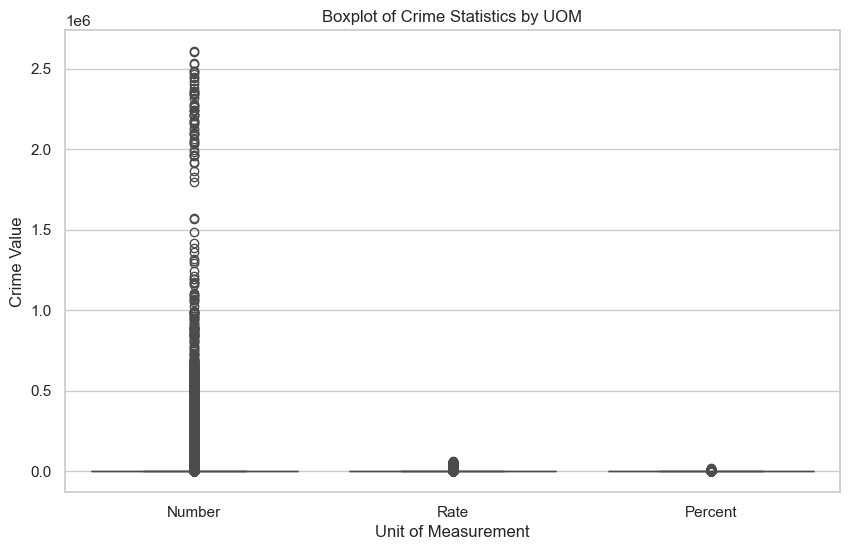

In [384]:
#Plotting box plot to detect outliers in the 'VALUE' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='UOM', y='VALUE', data=Crime_Statistics)
plt.title('Boxplot of Crime Statistics by UOM')
plt.xlabel('Unit of Measurement')
plt.ylabel('Crime Value')
plt.show()

Outliers are detected in. the dataset. However, after careful consideration of the nature of the data, the decision was made not to remove the outliers.
 
The dataset contains crime statistics, and crime rates can vary significantly depending on the location, year, and type of crime. Removing outliers could lead to unreliable and incorrect conclusions, as these extreme values may represent real-world scenarios. Ignoring them would result in a loss of critical information.
 
Crime rates can naturally range from 0 to 100 or more, depending on the specific metric and location. These variations are expected and are reflective of the dataset's diversity. Since the goal is to analyze crime statistics comprehensively, retaining all data points ensures a complete and unbiased analysis. We will proceed with further data analysis using the full dataset, including outliers, to ensure the results reflect real-world variations.

## 10. Initial Data Visualization

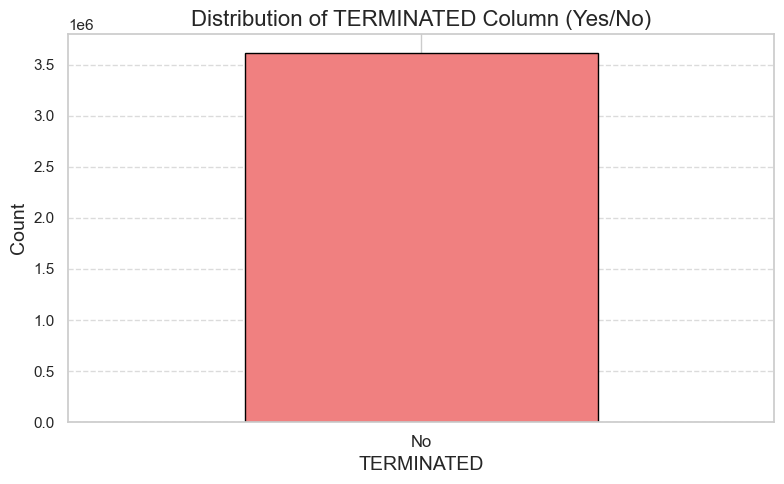

In [385]:
#Counting the occurrences of 'yes' and 'no' in the TERMINATED column
terminated_counts = Crime_Statistics['TERMINATED'].value_counts()

#Creating the bar chart
plt.figure(figsize=(8, 5))
terminated_counts.plot(kind='bar', color=['lightcoral', 'lightgreen'], edgecolor='black')

#Adding chart labels and title
plt.title('Distribution of TERMINATED Column (Yes/No)', fontsize=16)
plt.xlabel('TERMINATED', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Showing the plot
plt.tight_layout()
plt.show()

Before, the dataset initially included rows with both Terminate Status: Yes and No. Upon closer inspection, rows with Terminate Status: Yes corresponded to cases where the data was labeled as "not applicable". As all the rows with STATUS: .., which meant "Not Applicable" were removed, we are left only with rows where Terminate Status: No ensuring that the data retained is valid and applicable.

As, we only have one value "No" in TERMINATED column, we no longer need the column, so the best decision would be to drop this column.

In [386]:
#Dropping the column "TERMINATED"
Crime_Statistics.drop(['TERMINATED'], axis=1, inplace=True)

## 11. Segmenting Crime Data into National, Provincial, and City Level Breakdown

### Segmenting into National Level

In [387]:
#Extracting only national-level crime data
NationalLevelCrime = Crime_Statistics[Crime_Statistics['GEO'] == "Canada"].copy()

In [388]:
#Loading the first five rows of the NationalLevelCrime dataset
NationalLevelCrime.head(5)

,Year,GEO,Violations,Statistics,UOM,VECTOR,COORDINATE,VALUE
1875321,2005,Canada,"Total, all violations [0]",Actual incidents,Number,v44348247,1.1.1,2608741.00
1875322,2005,Canada,"Total, all violations [0]","Rate per 100,000 population",Rate,v44396346,1.1.2,8090.32
1875323,2005,Canada,"Total, all violations [0]",Percentage change in rate,Percent,v44391402,1.1.3,-3.59
1875324,2005,Canada,"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,v1545644596,1.1.17,100.00
1875327,2005,Canada,"Total, all violations [0]",Total cleared,Number,v44327422,1.1.4,1025889.00


In [389]:
#Checking the shape of the NationalLevelCrime dataset
NationalLevelCrime.shape

(74299, 8)

In [390]:
#Filtering "Actual incidents" and grouping by Year
NationalLevelActualIncidents = NationalLevelCrime[NationalLevelCrime['Statistics'] == "Actual incidents"] \
    .groupby('Year')['VALUE'].sum().reset_index()

In [391]:
#Displaying the table
print("Year-wise Crime Statistics for Actual Incidents:")
print(NationalLevelActualIncidents)

Year-wise Crime Statistics for Actual Incidents:
    Year       VALUE
0   2005  14481191.0
1   2006  14477436.0
2   2007  14051669.0
3   2008  13746892.0
4   2009  13557827.0
5   2010  13144419.0
6   2011  12552846.0
7   2012  12381432.0
8   2013  11569927.0
9   2014  11325703.0
10  2015  11706162.0
11  2016  11952328.0
12  2017  12237069.0
13  2018  12633477.0
14  2019  13559533.0
15  2020  12396078.0
16  2021  12511587.0
17  2022  13397950.0
18  2023  13964193.0


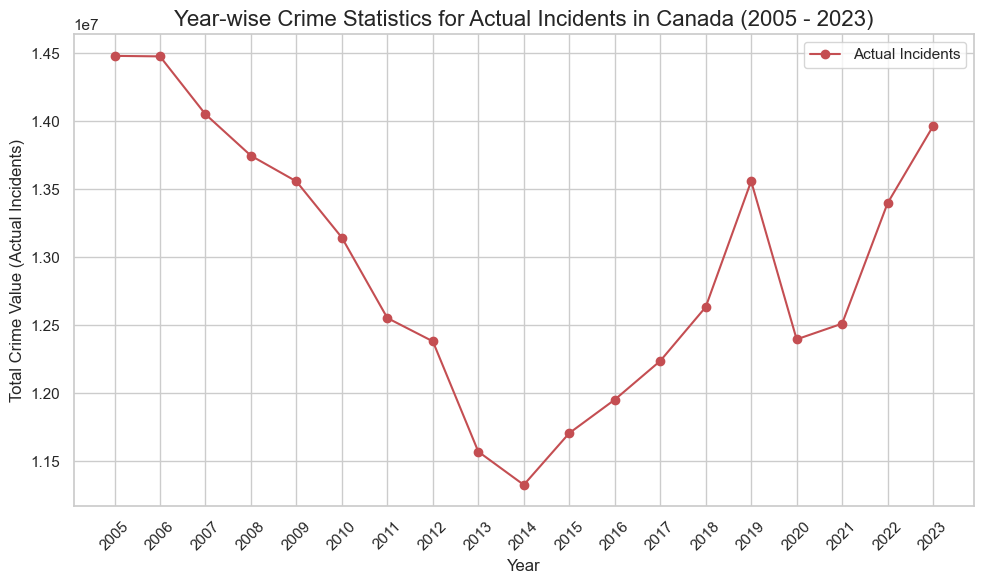

In [392]:
#Showing the trend over year from 2005 to 2023
#Setting plot style
sns.set(style="whitegrid")

#Plotting the crime data for Actual incidents
plt.figure(figsize=(10,6))
plt.plot(NationalLevelActualIncidents['Year'], NationalLevelActualIncidents['VALUE'], marker='o', linestyle='-', color='r', label='Actual Incidents')

#Adding titles and labels
plt.title('Year-wise Crime Statistics for Actual Incidents in Canada (2005 - 2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Crime Value (Actual Incidents)', fontsize=12)
plt.xticks(NationalLevelActualIncidents['Year'], rotation=45)
plt.tight_layout()

#Showing the plot
plt.legend()
plt.show()

In [393]:
#Getting the top 10 violations for "Actual incidents"
NationalLevelTopViolations = NationalLevelCrime[NationalLevelCrime['Statistics'] == "Actual incidents"] \
    .groupby('Violations')['VALUE'].sum().reset_index()

#Excluding "Total, all violations [0]"
NationalLevelTopViolations = NationalLevelTopViolations[NationalLevelTopViolations['Violations'] != "Total, all violations [0]"]

#Displaying the top 10 violations
NationalLevelTopViolations = NationalLevelTopViolations.sort_values(by='VALUE', ascending=False).head(10)
print("Top 10 Violations in Canada: ")
print(NationalLevelTopViolations)

Top 10 Violations in Canada: 
                                            Violations       VALUE
293  Total, all Criminal Code violations (including...  42171493.0
292  Total, all Criminal Code violations (excluding...  39680568.0
280              Total property crime violations [200]  24421586.0
287  Total theft under $5,000 (non-motor vehicle) [...   9907157.0
290       Total violent Criminal Code violations [100]   8450906.0
271         Total other Criminal Code violations [300]   6808076.0
267                               Total mischief [250]   5938150.0
148                                    Mischief [2170]   5935699.0
246                       Theft $5,000 or under [2140]   4406743.0
255   Total administration of justice violations [330]   3653267.0


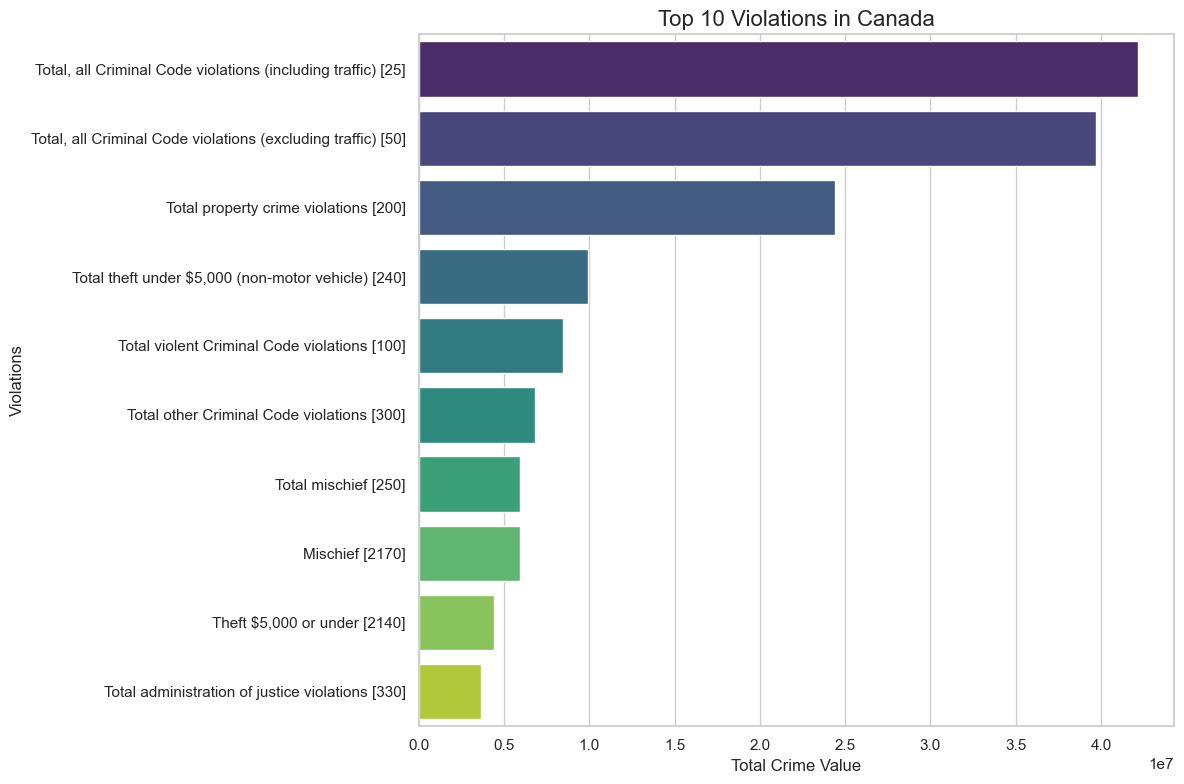

In [394]:
#Setting plot style
sns.set(style="whitegrid")

#CCreate a bar plot for the top 10 violations
plt.figure(figsize=(12,8))
sns.barplot(data=NationalLevelTopViolations, x='VALUE', y='Violations', hue='Violations', palette='viridis', legend=False)

#Adding titles and labels
plt.title('Top 10 Violations in Canada', fontsize=16)
plt.xlabel('Total Crime Value', fontsize=12)
plt.ylabel('Violations', fontsize=12)
plt.tight_layout()

#Showing the plot
plt.show()

To facilitate further exploration and analysis of crime data, we are exporting the NationalLevelCrime dataframe to a CSV file. This file can then be imported into Power BI or any other data visualization tool to gain deeper insights and create interactive visualizations.

In [395]:
#Saving the NationalLevelCrime dataframe to a CSV file
NationalLevelCrime.to_csv("./NationalLevelCrimeStatistics.csv", index=False)

print("Data saved successfully as NationalLevelCrimeStatistics.csv")

Data saved successfully as NationalLevelCrimeStatistics.csv


### Segmenting into Provincial Level

In [396]:
#Listing known provinces in Canada
CanadaProvince = [
    'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 
    'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island', 
    'Quebec', 'Saskatchewan', 'Yukon'
]

#Function to extract provinces from the GEO column that starts with a known province name
def match_province(geo_value):
    for province in CanadaProvince:
        if geo_value.startswith(province):  #Checking if the GEO starts with the known province
            
            #Extracting the province
            match = re.match(r'([A-Za-z\s&]+)\s\[(\d+)\]', geo_value)
            if match:
                return f"{match.group(1)} [{match.group(2)}]"
    return None  #If no match is found, return None

#Extracting and cleaning provinces from the GEO column
Crime_Statistics['Province'] = Crime_Statistics['GEO'].apply(match_province)

#Filtering out None values (no match found)
ExtractedProvinces = Crime_Statistics['Province'].dropna().unique()

#Displaying the list of provinces found in the dataset
print("List of provinces in the dataset:")
print(ExtractedProvinces)

List of provinces in the dataset:
['Newfoundland and Labrador [10]' 'Prince Edward Island [11]'
 'Nova Scotia [12]' 'New Brunswick [13]' 'Quebec [24]' 'Ontario [35]'
 'Manitoba [46]' 'Saskatchewan [47]' 'Alberta [48]'
 'British Columbia [59]' 'Yukon [60]' 'Northwest Territories [61]'
 'Nunavut [62]']


In [397]:
#Filtering the Crime_Statistics dataframe for each province and creating a new dataframe
ProvinceLevelCrime = Crime_Statistics[Crime_Statistics['GEO'].isin(ExtractedProvinces)].copy()

#Resetting index for better handling
ProvinceLevelCrime.reset_index(drop=True, inplace=True)

In [398]:
#Function to clean the province names (removing square brackets and numbers)
def CleanProvince(province_name):
    return re.sub(r'\s\[\d+\]', '', province_name)  # Remove square brackets & numbers

#Applying the function to clean the 'Province' column
ProvinceLevelCrime['Province'] = ProvinceLevelCrime['Province'].apply(CleanProvince)

In [399]:
#Loading the first five rows of ProvinceLevelCrime dataset
ProvinceLevelCrime.head(5)

,Year,GEO,Violations,Statistics,UOM,VECTOR,COORDINATE,VALUE,Province
0,2005,Newfoundland and Labrador [10],"Total, all violations [0]",Actual incidents,Number,v44339986,2.1.1,34504.00,Newfoundland and Labrador
1,2005,Newfoundland and Labrador [10],"Total, all violations [0]","Rate per 100,000 population",Rate,v44348517,2.1.2,6708.10,Newfoundland and Labrador
2,2005,Newfoundland and Labrador [10],"Total, all violations [0]",Percentage change in rate,Percent,v44347823,2.1.3,-2.24,Newfoundland and Labrador
3,2005,Newfoundland and Labrador [10],"Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,v1545648017,2.1.17,100.00,Newfoundland and Labrador
4,2005,Newfoundland and Labrador [10],"Total, all violations [0]",Total cleared,Number,v44395152,2.1.4,13329.00,Newfoundland and Labrador


In [400]:
#Checking the shape of ProvinceLevelCrime dataset
ProvinceLevelCrime.shape

(944092, 9)

Before moving further, let's conduct the analysis to compare the National Level Crime and Province Level Crime values for the years 2005 to 2023.

In [401]:
#Listing of years from 2005 to 2023
Years = list(range(2005, 2024))

#Initializing an empty list to store the results for each year
CombinedTotalValues = []

#Looping through each year and filter both NationalLevelCrime and ProvinceLevelCrime datasets
for year in Years:
    #Filtering the ProvinceLevelCrime dataset for the given year and other conditions
    FilteredProvinceLevel = ProvinceLevelCrime[(ProvinceLevelCrime['Year'] == year) & 
                                                 (ProvinceLevelCrime['Statistics'] == "Actual incidents") 
                                                 & (ProvinceLevelCrime['Violations'] == "Total, all violations [0]")]
    
    #Calculating the total sum of the 'VALUE' column for the province level crime for the current year
    ProvinceTotalValue = FilteredProvinceLevel['VALUE'].sum()
    
    #Filtering the NationalLevelCrime dataset for the given year and other conditions
    FilteredNationalLevel = NationalLevelCrime[(NationalLevelCrime['Year'] == year) & 
                                                  (NationalLevelCrime['Statistics'] == "Actual incidents") 
                                                  & (NationalLevelCrime['Violations'] == "Total, all violations [0]")]
    
    #Calculating the total sum of the 'VALUE' column for the national level crime for the current year
    NationalTotalValue = FilteredNationalLevel['VALUE'].sum()
    
    #Checking if the values match
    Matched = 'Yes' if NationalTotalValue == ProvinceTotalValue else 'No'
    
    #Appending the result for both national and province total values along with the match status
    CombinedTotalValues.append({'Year': year, 
                                  'National Level Crime Value': NationalTotalValue, 
                                  'Province Level Crime Value': ProvinceTotalValue,
                                  'Matched': Matched})

#Converting the results to a DataFrame for better readability
CombinedTotalValuesDataframe = pd.DataFrame(CombinedTotalValues)

#Displaying the results
print(CombinedTotalValuesDataframe)

    Year  National Level Crime Value  Province Level Crime Value Matched
0   2005                   2608741.0                   2608741.0     Yes
1   2006                   2606887.0                   2606887.0     Yes
2   2007                   2534730.0                   2534730.0     Yes
3   2008                   2485043.0                   2485043.0     Yes
4   2009                   2448654.0                   2448654.0     Yes
5   2010                   2379130.0                   2379130.0     Yes
6   2011                   2275917.0                   2275917.0     Yes
7   2012                   2244458.0                   2244458.0     Yes
8   2013                   2098776.0                   2098776.0     Yes
9   2014                   2052925.0                   2052925.0     Yes
10  2015                   2118681.0                   2118681.0     Yes
11  2016                   2161927.0                   2161927.0     Yes
12  2017                   2213293.0               

The comparison shows that for the majority of the years, the values from both the national and provincial datasets match perfectly. However, there are discrepancies in the values for the years 2020, 2021, 2022, and 2023, where the values for Province Level Crime slightly differ from the National Level Crime values.

The discrepancies observed are likely due to the inclusion of Canadian Forces Military Police (CF MP Gp) data at the national level, which is not reflected at the provincial level. As per the metadata, the Canadian Forces Military Police (CF MP Gp) began reporting incidents to the Uniform Crime Reporting (UCR) Survey from January 2020.

Let's verify the counts for Canadian Forces Military Police [99001] for the years with the discrepancy to see if this is the reason for discrepancies or not.

In [402]:
#Filtering the dataset for Canadian Forces Military Police [99001]
MilitaryPoliceData = Crime_Statistics[
    (Crime_Statistics['GEO'] == "Canadian Forces Military Police [99001]") & 
    (Crime_Statistics['Statistics'] == "Actual incidents") & 
    (Crime_Statistics['Violations'] == "Total, all violations [0]")
]

#Displaying the filtered data
print(MilitaryPoliceData[['Year', 'VALUE']])

         Year   VALUE
6332622  2020  1050.0
6634950  2021  1513.0
6937278  2022  1930.0
7239606  2023  2210.0


The discrepancy observed in the National Level Crime and Province Level Crime data for the years 2020, 2021, 2022, and 2023 aligns with the inclusion of crime data reported by the Canadian Forces Military Police (CF MP Gp) at the national level, which is not reflected in the province-level data.

The CF MP Gp data is aggregated at the national level for confidentiality and small count protection, further confirming that the discrepancy is due to the absence of this data in the province-level breakdown.

#### Visualization 1 - Box Plot: Distribution of Crimes by Province

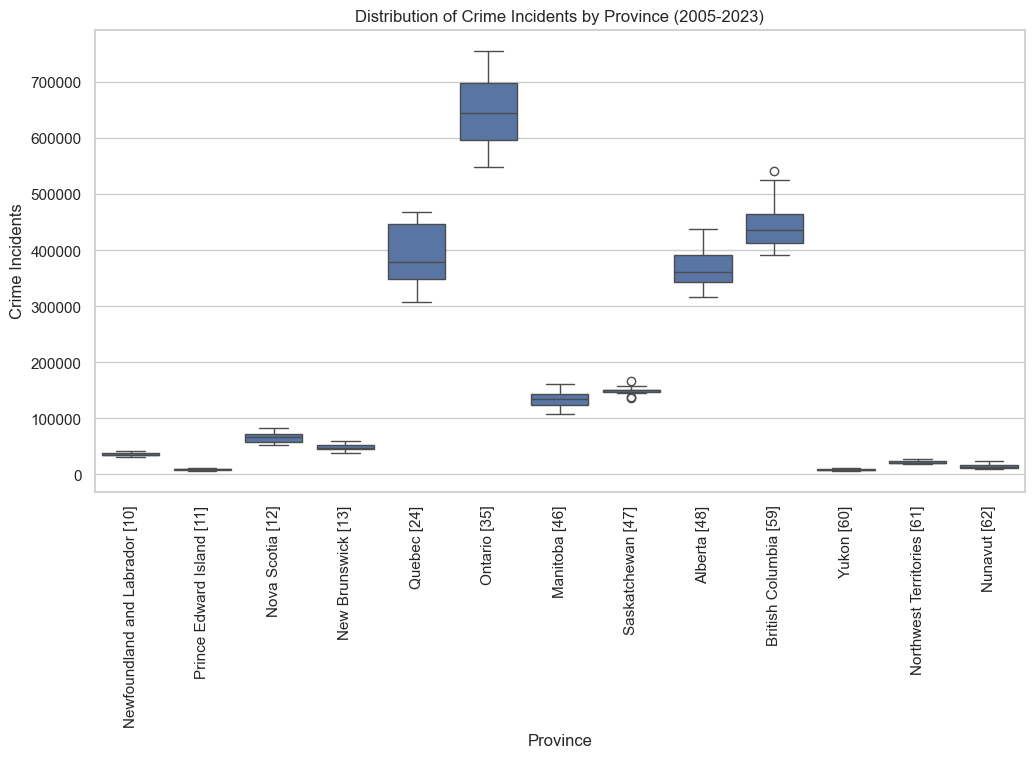

In [403]:
#Filtering data for 'Actual Incidents' from 2005 to 2023
ProvinceLevelActualIncidents = ProvinceLevelCrime[
    (ProvinceLevelCrime['Year'].between(2005, 2023)) &
    (ProvinceLevelCrime['Statistics'] == "Actual incidents") &
    (ProvinceLevelCrime['Violations'] == "Total, all violations [0]")
]

#Setting plot style
sns.set_style("whitegrid")

#Creating the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='GEO', y='VALUE', data=ProvinceLevelActualIncidents)

#Customizing labels and title
plt.xticks(rotation=90)  #Rotating x-axis labels for readability
plt.title("Distribution of Crime Incidents by Province (2005-2023)")
plt.xlabel("Province")
plt.ylabel("Crime Incidents")

#Showing the plot
plt.show()

In [404]:
#Filtering dataset based on conditions
FilteredCrimeDataProvincial = ProvinceLevelCrime[
    (ProvinceLevelCrime['Year'].between(2005, 2023)) &
    (ProvinceLevelCrime['Statistics'] == "Actual incidents") &
    (ProvinceLevelCrime['Violations'] == "Total, all violations [0]")
].copy()  #Creating a copy to avoid warnings

#Grouping by Province and summing the crime incidents
CrimeSummary = FilteredCrimeDataProvincial.groupby('Province', as_index=False)['VALUE'].sum()

#### Visualization 2 - Bar Chart: Province with the Highest Total Crime Incidents

In [405]:
#Creating a Bar chart showing total crimes per province
fig = px.bar(CrimeSummary,
             x="Province", 
             y="VALUE", 
             color="Province",
             title="Total Crime Incidents by Province (2005-2023)",
             labels={"VALUE": "Total Crimes", "Province": "Province"},
             color_continuous_scale="Reds")

fig.show()

#### Visualization 3 - Line Chart: Crime Trends Over Time (2005-2023)

In [406]:
#Grouping by Year and Province, and summing the crimes for each combination
CrimeTrends = FilteredCrimeDataProvincial.groupby(['Year', 'Province'], as_index=False)['VALUE'].sum()

#Creating a line chart to visualize crime trends over the years for each province
fig = px.line(CrimeTrends, 
              x="Year", 
              y="VALUE", 
              color="Province",
              title="Crime Trends Across Provinces (2005-2023)",
              labels={"VALUE": "Total Crimes", "Year": "Year", "Province": "Province"})

fig.show()

#### Visualization 4 - Pie Chart: Crime Distribution Across Provinces

In [407]:
#Pie chart for crime distribution across provinces
fig = px.pie(CrimeSummary, 
             names="Province", 
             values="VALUE", 
             title="Crime Distribution Across Canadian Provinces (2005-2023)")

fig.show()

In [408]:
#Saving the ProvinceLevelCrime dataframe to a CSV file
ProvinceLevelCrime.to_csv("./ProvinceLevelCrimeStatistics.csv", index=False)

print("Data saved successfully as ProvinceLevelCrimeStatistics.csv")

Data saved successfully as ProvinceLevelCrimeStatistics.csv


### Segmenting into City Level

In [409]:
#Filtering the rows where 'GEO' contains a five-digit code in square brackets which represents the city
CityLevelCrime = Crime_Statistics[Crime_Statistics['GEO'].str.contains(r'\[\d{5}\]', regex=True)].copy()

In [410]:
CityLevelCrime['GEO'].unique()

array(["St. John's, Newfoundland and Labrador [10001]",
       'Halifax, Nova Scotia [12205]',
       'Saint John, New Brunswick [13310]', 'Saguenay, Quebec [24408]',
       'Québec, Quebec [24421]', 'Sherbrooke, Quebec [24433]',
       'Trois-Rivières, Quebec [24442]', 'Montréal, Quebec [24462]',
       'Ottawa-Gatineau, Quebec part [24505]',
       'Ottawa-Gatineau, Ontario part [35505]',
       'Kingston, Ontario [35521]', 'Toronto, Ontario [35535]',
       'Hamilton, Ontario [35537]',
       'St. Catharines-Niagara, Ontario [35539]',
       'Kitchener-Cambridge-Waterloo, Ontario [35541]',
       'London, Ontario [35555]', 'Windsor, Ontario [35559]',
       'Greater Sudbury, Ontario [35580]', 'Thunder Bay, Ontario [35595]',
       'Winnipeg, Manitoba [46602]', 'Regina, Saskatchewan [47705]',
       'Saskatoon, Saskatchewan [47725]', 'Calgary, Alberta [48825]',
       'Edmonton, Alberta [48835]',
       'Abbotsford-Mission, British Columbia [59932]',
       'Vancouver, British Columb

In [411]:
#Separating city and province from the dataset and adding new columns
CityLevelCrime.loc[:, 'City'] = CityLevelCrime['GEO'].str.extract(r'^(.*?),\s*')  #City is before the first comma

 #Function to handle Ottawa-Gatineau case
def match_province(geo_value):
    #Special case handling for "Ottawa-Gatineau"
    if "Ottawa-Gatineau" in geo_value:
        if "Quebec" in geo_value:
            return "Quebec"
        elif "Ontario" in geo_value:
            return "Ontario"

#Function to extract provinces from the GEO column that starts with a known province name
def match_province(geo_value):
    
    #Listing known provinces in Canada
    CanadaProvince = [
        'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 
        'Northwest Territories', 'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island', 
        'Quebec', 'Saskatchewan', 'Yukon'
    ]
    
    #Checking if any known province is in the GEO string
    for province in CanadaProvince:
        if province in geo_value:
            return province  #Returning the matched province
    return None  #If no match is found, returning None

#Extracting and cleaning provinces from the GEO column
CityLevelCrime['Province'] = CityLevelCrime['GEO'].apply(match_province)

#Resetting index for better handling
CityLevelCrime.reset_index(drop=True, inplace=True)

In [412]:
#Loading the top 5 rows of CityLevelCrime dataset
CityLevelCrime.head(5)

,Year,GEO,Violations,Statistics,UOM,VECTOR,COORDINATE,VALUE,Province,City
0,2005,"St. John's, Newfoundland and Labrador [10001]","Total, all violations [0]",Actual incidents,Number,v44369503,3.1.1,12537.00,Newfoundland and Labrador,St. John's
1,2005,"St. John's, Newfoundland and Labrador [10001]","Total, all violations [0]","Rate per 100,000 population",Rate,v44401654,3.1.2,6955.84,Newfoundland and Labrador,St. John's
2,2005,"St. John's, Newfoundland and Labrador [10001]","Total, all violations [0]",Percentage change in rate,Percent,v44392014,3.1.3,-2.90,Newfoundland and Labrador,St. John's
3,2005,"St. John's, Newfoundland and Labrador [10001]","Total, all violations [0]",Percentage contribution to the Crime Severity ...,Percent,v1545651438,3.1.17,100.00,Newfoundland and Labrador,St. John's
4,2005,"St. John's, Newfoundland and Labrador [10001]","Total, all violations [0]",Total cleared,Number,v44326088,3.1.4,3284.00,Newfoundland and Labrador,St. John's


In [413]:
#Checking the unique Citites in CityLevelCrime dataset
CityLevelCrime['City'].unique()

array(["St. John's", 'Halifax', 'Saint John', 'Saguenay', 'Québec',
       'Sherbrooke', 'Trois-Rivières', 'Montréal', 'Ottawa-Gatineau',
       'Kingston', 'Toronto', 'Hamilton', 'St. Catharines-Niagara',
       'Kitchener-Cambridge-Waterloo', 'London', 'Windsor',
       'Greater Sudbury', 'Thunder Bay', 'Winnipeg', 'Regina',
       'Saskatoon', 'Calgary', 'Edmonton', 'Abbotsford-Mission',
       'Vancouver', 'Victoria', 'Moncton', 'Peterborough', 'Brantford',
       'Guelph', 'Barrie', 'Kelowna', 'Belleville-Quinte West',
       'Lethbridge', nan, 'Fredericton', 'Drummondville', 'Red Deer',
       'Kamloops', 'Chilliwack', 'Nanaimo'], dtype=object)

In [414]:
#Checking the unique Provinces in CityLevelCrime dataset
CityLevelCrime['Province'].unique()

array(['Newfoundland and Labrador', 'Nova Scotia', 'New Brunswick',
       'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta',
       'British Columbia', None], dtype=object)

We do have the Province "None" in the dataset, let's check if None represents the rows for "Canadian Forces Military Police [99001]" or not.

In [415]:
#Checking GEO values where Province is None
CityLevelCrime[CityLevelCrime['Province'].isna()]['GEO'].unique()


array(['Canadian Forces Military Police [99001]'], dtype=object)

Let's exclude Canadian Force Military Police data from the dataset.

In [416]:
#Excluding the row where GEO is 'Canadian Forces Military Police [99001]'
CityLevelCrime = CityLevelCrime[CityLevelCrime['GEO'] != 'Canadian Forces Military Police [99001]']

In [417]:
#Verifying the unique provinces in CityLevelCrime dataste
CityLevelCrime['Province'].unique()

array(['Newfoundland and Labrador', 'Nova Scotia', 'New Brunswick',
       'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta',
       'British Columbia'], dtype=object)

In [418]:
CityLevelCrime.shape

(2512027, 10)

Before moving further, let's conduct the analysis to compare the Province Level Crime and City Level Crime values for the years 2005 to 2023.

In [419]:
FilteredCityLevel = CityLevelCrime[(CityLevelCrime['Year'] == 2010) & 
                                    (CityLevelCrime['Statistics'] == "Actual incidents") 
                                    & (CityLevelCrime['Violations'] == "Total, all violations [0]")
                                    & (CityLevelCrime['Province'] == "New Brunswick")]

print(FilteredCityLevel)

        Year                                GEO                 Violations  \
521906  2010     Moncton, New Brunswick [13305]  Total, all violations [0]   
525179  2010  Saint John, New Brunswick [13310]  Total, all violations [0]   

              Statistics     UOM     VECTOR COORDINATE    VALUE  \
521906  Actual incidents  Number  v52121490     43.1.1   9109.0   
525179  Actual incidents  Number  v44402058      8.1.1  10273.0   

             Province        City  
521906  New Brunswick     Moncton  
525179  New Brunswick  Saint John  


In [420]:
FilteredLevel = ProvinceLevelCrime[(ProvinceLevelCrime['Year'] == 2010) & 
                                    (ProvinceLevelCrime['Statistics'] == "Actual incidents") 
                                    & (ProvinceLevelCrime['Violations'] == "Total, all violations [0]")
                                    & (ProvinceLevelCrime['Province'] == "New Brunswick")]

print(FilteredLevel)

        Year                 GEO                 Violations        Statistics  \
221973  2010  New Brunswick [13]  Total, all violations [0]  Actual incidents   

           UOM     VECTOR COORDINATE    VALUE       Province  
221973  Number  v44331594      7.1.1  47735.0  New Brunswick  


In [421]:
#Saving the CityLevelCrime dataframe to a CSV file
CityLevelCrime.to_csv("./CityLevelCrimeStatistics.csv", index=False)

print("Data saved successfully as CityLevelCrimeStatistics.csv")

Data saved successfully as CityLevelCrimeStatistics.csv
